# Dataset sul Traffico di Rete

Il dataset che useremo in questa esercitazione contiene caratteristiche estratte da sessioni di traffico di rete, progettate per l'analisi e il rilevamento di malware basato sul comportamento della rete. Le caratteristiche sono organizzate in diverse categorie funzionali.

## Categorie principali di caratteristiche

### Informazioni sulla sessione
- **Informazioni temporali**: `start`, `duration`, `cap_date`, `daysTime`, `weekDay`
- **Informazioni di connessione**: Indirizzi IP e porte (`...ip`, `...port`)
- **Etichette**: `label`, `labelSS` (classificazione del malware)

### Metriche TCP/IP
- **Statistiche pacchetti**: Conteggio pacchetti (`packets_...`), dimensioni (`packetsize...`), rapporti (`packetsAB_ratio`)
- **Flag TCP**: Pacchetti ACK (`ack_...`), PUSH (`push_...`), RESET (`reset_...`), URG (`urg_...`)
- **Tempi di arrivo**: Tempi tra pacchetti (`packetinterarrivel_...`)
- **Time-to-live**: Valori TTL per pacchetti client/server (`ttl_...`, `ttlA...`, `ttlB...`)
- **Analisi TCP**: Pacchetti persi, ritrasmessi (`tcpanalysis...`)
- **Bytes trasferiti**: Totali e rapporti (`bytes_...`, `bytesAB_ratio`)

### Protocollo HTTP
- **Richieste HTTP**: Metodi GET/POST (`http_GET`, `http_POST`), conteggi (`httpcount...`)
- **Bytes HTTP**: Dimensioni richieste/risposte (`httpreqbytes_...`, `httprespbytes_...`)
- **Tempi HTTP**: Tempi di risposta (`httptime...`), tempi tra richiesta e risposta (`httpinterarrivel_...`)
- **Cookie**: Conteggio e valori (`httpcookiecount`, `httpcookievalues_...`)
- **Host dominante**: URL, rank Alexa, tipo di browser (`httpdom...`)
- **Classificazione URL**: Identificatori per CDN, ad, cloud, ecc. (`iscdnhttp`, `isadhttp`, `iscloudhttp`, etc.)

### Protocollo DNS
- **Risposta DNS**: Conteggio indirizzi, risposte, flag (`dnscountaddresses`, `dns_flag`)
- **Hostname DNS**: Nome host, TTL (`dnshostname`, `dnsminttl`)
- **Tempi DNS**: Tempo di risposta (`dns_time`)
- **Rank Alexa**: Rank del server nella risposta DNS (`dns_alexaRank`)

### Protocollo SSL/TLS
- **Handshake SSL**: Durata (`sslhandshakeduration_...`)
- **Bytes SSL**: Bytes richiesta/risposta (`sslreqbytes_...`, `sslrespbytes_...`)
- **Certificati**: Conteggio, rapporti (`sslcountcertificates`, `sslratio...`)
- **Cifrari e algoritmi**: Conteggio cifrari supportati (`sslcountclient_...`, `sslcountserver_...`)
- **Versioni SSL**: Numero di versioni, versione dominante (`ssldomserver_ciphersuite`, `ssldomserver_compression`)

### Informazioni geografiche e di routing
- **ASN**: Numero di sistemi autonomi (`asn_...`)
- **Paesi**: Numero di paesi per client/server (`country_...`)


# Obiettivo
  Classificare un dispositivo come dispositivo di sicurezza o no. Vedi colonna `is_security_device`

In [1]:
import pandas as pd
df = pd.read_csv('datasets/iot_device_binary_transformed.csv')

### Stampiamo le colonne

In [2]:
df.columns

Index(['ack', 'ack_A', 'ack_B', 'bytes', 'bytes_A', 'bytes_A_B_ratio',
       'bytes_B', 'ds_field_A', 'ds_field_B', 'duration',
       ...
       'suffix_is_co.il', 'suffix_is_com', 'suffix_is_com.sg',
       'suffix_is_else', 'suffix_is_empty_char_value',
       'suffix_is_googleapis.com', 'suffix_is_net', 'suffix_is_org',
       'suffix_is_unresolved', 'is_security_device'],
      dtype='object', length=298)

### Vediamo che tipologia di valori dobbiamo classificare

In [3]:
df["is_security_device"]

0      1
1      1
2      1
3      1
4      1
      ..
895    0
896    0
897    0
898    0
899    0
Name: is_security_device, Length: 900, dtype: int64

#### Abbiamo uni e zeri. Quindi indicano delle classi discrete
Vediamo se il dataset è bilanciato

In [4]:
df['is_security_device'].value_counts()

is_security_device
0    500
1    400
Name: count, dtype: int64

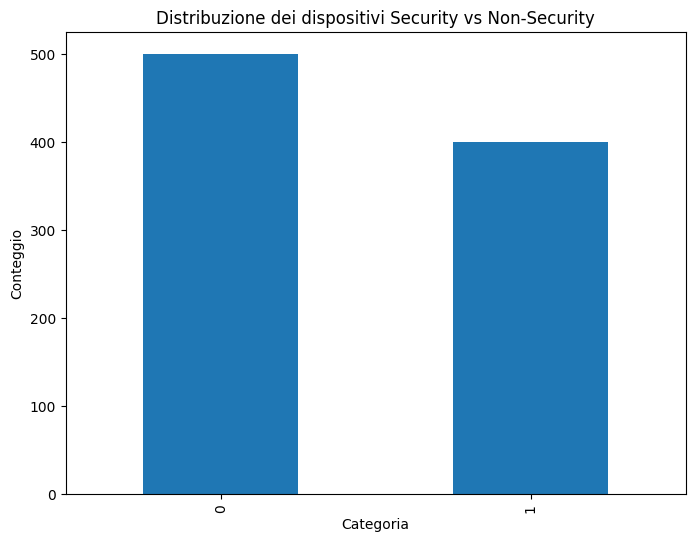

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
df['is_security_device'].value_counts().plot(kind='bar')
plt.title('Distribuzione dei dispositivi Security vs Non-Security')
plt.xlabel('Categoria')
plt.ylabel('Conteggio')
plt.show()

### Proviamo a filtrare qualche colonna in base al modulo della correlazione

In [ ]:
# Calcolo le correlazioni con la variabile target
correlations = df.corrwith(df['is_security_device'])
# Filtro le features con correlazione superiore a 0.3 in valore assoluto
significant_features = correlations[abs(correlations) > 0.3].index.tolist()
# Rimuovo la variabile target dall'elenco delle features se presente
if 'is_security_device' in significant_features:
    significant_features.remove('is_security_device')

# Creao un nuovo DataFrame con solo le features significative e la variabile target
df = df[significant_features + ['is_security_device']]
# Visualizzare le dimensioni del nuovo DataFrame
print(f"Dimensioni del nuovo DataFrame: {df.shape}")
print(f"Features selezionate: {len(significant_features)}")

Dimensioni del nuovo DataFrame: (900, 44)
Features selezionate: 43


c:\Users\luigi\python\ML_Course_2025\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\luigi\python\ML_Course_2025\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [7]:
df.head()

,ds_field_B,http_GET,http_count_host,http_count_req_content_type,http_count_resp_code,http_count_resp_content_type,http_count_user_agents,http_has_req_content_type,http_has_resp_content_type,http_has_user_agent,...,ttl_stdev,ttl_var,is_http,B_port_is_11095,B_port_is_80,B_port_is_8080,subdomain_is_else,domain_is_else,suffix_is_empty_char_value,is_security_device
0,0,0,0,0,0,0,0,0,0,0,...,80.973083,6556.640244,0,0,0,0,1,1,0,1
1,0,0,0,0,0,0,0,0,0,0,...,81.470988,6637.521951,0,0,0,0,1,1,0,1
2,0,0,0,0,0,0,0,0,0,0,...,82.466290,6800.689024,0,0,0,0,1,1,0,1
3,0,0,0,0,0,0,0,0,0,0,...,82.495610,6805.525610,0,0,0,0,1,1,0,1
4,0,0,0,0,0,0,0,0,0,0,...,82.801553,6856.097252,0,0,0,0,1,1,0,1


Abbiamo tanti zeri e uni... Contiamo se ci sono null e filtriamo orizzontalmente in base alla varianza di ogni colonna

In [8]:
# Verifica dei valori NaN
nan_counts = df.isna().sum()
print(f"Colonne con valori NaN:")
print(nan_counts[nan_counts > 0])

Colonne con valori NaN:
Series([], dtype: int64)


In [9]:
import pandas as pd
import numpy as np

def normalize_variance(df):
        return df.var() / df.max()

# Calcola la varianza normalizzata
varianza_norm = normalize_variance(df)

# Ordina le colonne in base alla varianza normalizzata (dal più alto al più basso)
varianza_ordinata = varianza_norm.sort_values(ascending=False)

# Seleziona i nomi delle prime 10 colonne con varianza più alta
top_10_colonne = varianza_ordinata.head(10).index.tolist()

# Stampa i nomi e i valori delle prime 10 colonne
print("Top 10 colonne con varianza normalizzata più alta:")
for colonna in top_10_colonne:
    print(f"{colonna}: {varianza_norm[colonna]}")


df_top_10 = df[top_10_colonne]


Top 10 colonne con varianza normalizzata più alta:
ttl_var: 1330.9850883452973
http_inter_arrivel_sum: 269.3767468676106
http_inter_arrivel_max: 150.37803549357778
http_inter_arrivel_thirdQ: 44.37273343996672
http_inter_arrivel_avg: 40.66207708211984
http_req_bytes_median: 35.821965151623125
http_req_bytes_firstQ: 35.821965151623125
http_req_bytes_max: 35.821965151623125
http_req_bytes_avg: 35.821965151623125
http_req_bytes_thirdQ: 35.821965151623125


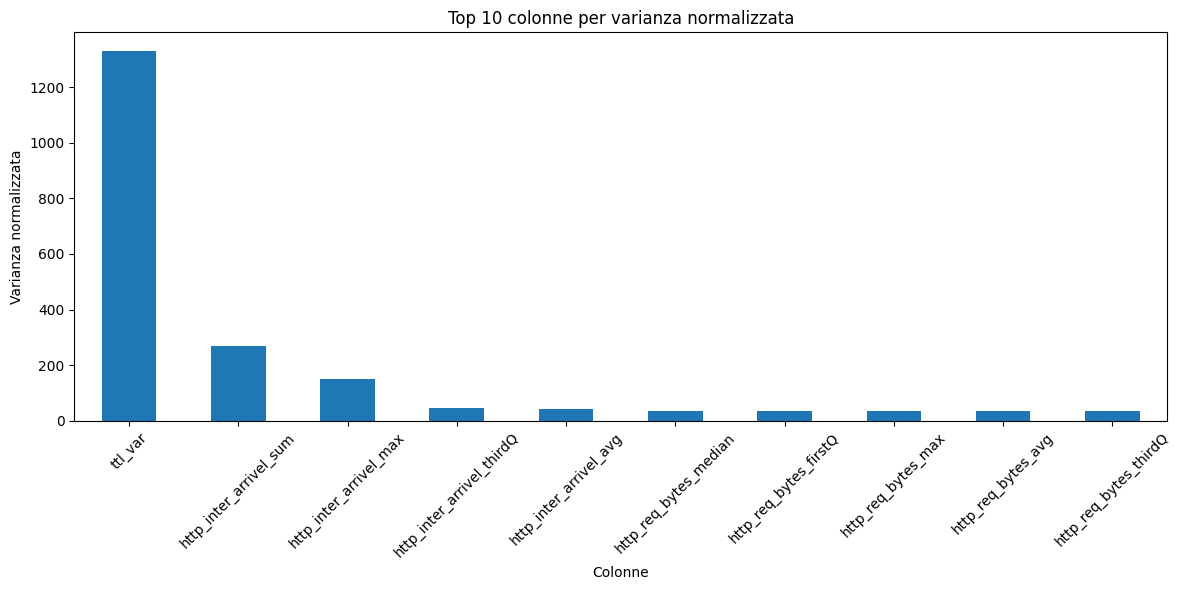

In [10]:
import matplotlib.pyplot as plt

# Visualizza le top 10 colonne con un grafico a barre
plt.figure(figsize=(12, 6))
varianza_ordinata.head(10).plot(kind='bar')
plt.title('Top 10 colonne per varianza normalizzata')
plt.ylabel('Varianza normalizzata')
plt.xlabel('Colonne')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
df_top_10["is_security_device"] = df['is_security_device']
cleaned_df = df_top_10

C:\Users\luigi\AppData\Local\Temp\ipykernel_195260\2700016466.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_10["is_security_device"] = df['is_security_device']


In [12]:
cleaned_df

,ttl_var,http_inter_arrivel_sum,http_inter_arrivel_max,http_inter_arrivel_thirdQ,http_inter_arrivel_avg,http_req_bytes_median,http_req_bytes_firstQ,http_req_bytes_max,http_req_bytes_avg,http_req_bytes_thirdQ,is_security_device
0,6556.640244,2840.981562,1547.304718,694.86998,648.797378,0,0,0,0,0,1
1,6637.521951,2840.981562,1547.304718,694.86998,648.797378,0,0,0,0,0,1
2,6800.689024,2840.981562,1547.304718,694.86998,648.797378,0,0,0,0,0,1
3,6805.525610,2840.981562,1547.304718,694.86998,648.797378,0,0,0,0,0,1
4,6856.097252,2840.981562,1547.304718,694.86998,648.797378,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
895,30.192024,2840.981562,1547.304718,694.86998,648.797378,0,0,0,0,0,0
896,28.615385,2840.981562,1547.304718,694.86998,648.797378,0,0,0,0,0,0
897,39.084416,2840.981562,1547.304718,694.86998,648.797378,0,0,0,0,0,0
898,33.516129,2840.981562,1547.304718,694.86998,648.797378,0,0,0,0,0,0


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class LogisticRegression:
    """
    Implementazione da zero della regressione logistica utilizzando
    la discesa del gradiente, con tracking del costo sul set di test.
    """
    
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        """
        Inizializzazione del modello
        
        Parametri:
        learning_rate: tasso di apprendimento per la discesa del gradiente
        n_iterations: numero di iterazioni per la discesa del gradiente
        """
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.train_cost_history = []
        self.test_cost_history = []
    
    def sigmoid(self, z):
        """
        Funzione sigmoide: trasforma un numero reale in una probabilità (0-1)
        """
        # Limitiamo z per evitare overflow/underflow numerici
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))
    
    def predict_raw(self, X, weights):
        """
        Calcola le previsioni usando il modello lineare y = X*w.
        
        Parametri:
        X -- matrice di input di shape (m, n+1) con una colonna di 1 aggiunta per il termine di bias
        weights -- vettore dei pesi di shape (n+1, 1)
        
        Restituisce:
        predictions -- vettore delle previsioni di shape (m, 1)
        """
        return np.dot(X, weights)

    def compute_cost(self, X, y, weights):
        """
        Calcola la funzione di costo (log loss)
        
        J(w) = -1/m * sum(y*log(h) + (1-y)*log(1-h))
        
        dove:
        m = numero di esempi
        h = sigmoid(X*w) = previsione
        """
        m = X.shape[0]
        z = self.predict_raw(X, weights) # predictions
        h = self.sigmoid(z) # Applico la sigmoide
        
        # Per evitare log(0), limitiamo h a valori molto piccoli ma non zero
        epsilon = 1e-15
        h = np.clip(h, epsilon, 1 - epsilon)
        # Clip serve a limitare i valori di h tra epsilon e 1-epsilon
        # se h fosse 0, log(0) diverrebbe -inf, se h fosse 1, log(1-h) sarebbe -inf
        
        cost = -1/m * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
        return cost
    
    def compute_gradient(self, X, y, weights):
        """
        Calcola il gradiente della funzione di costo rispetto ai pesi
        
        gradient = (1/m) * X^T * (h - y)
        
        dove:
        m = numero di esempi
        h = sigmoid(X*w) = previsione
        """
        m = X.shape[0]
        z = np.dot(X, weights)
        h = self.sigmoid(z)
        
        # Calcolo del gradiente
        gradient = 1/m * np.dot(X.T, (h - y))
        return gradient

    def gradient_descent(self, X_train, y_train, X_test=None, y_test=None):
        """
        Implementa la discesa del gradiente per trovare i pesi ottimali
        
        L'aggiornamento dei pesi avviene secondo la formula:
        w = w - learning_rate * gradiente
        
        Parametri:
        X_train, y_train: set di addestramento
        X_test, y_test: set di test opzionale per monitorare le performance
        """
        m, n = X_train.shape
        self.weights = np.zeros(n)
        
        for i in range(self.n_iterations):
            # Calcolo del gradiente sul training set
            gradient = self.compute_gradient(X_train, y_train, self.weights)
            
            # Aggiornamento dei pesi
            self.weights = self.weights - self.learning_rate * gradient
            
            # Salvataggio del costo di training per questa iterazione
            train_cost = self.compute_cost(X_train, y_train, self.weights)
            self.train_cost_history.append(train_cost)
            
            # Se forniti X_test e y_test, calcola anche il costo sul test set
            if X_test is not None and y_test is not None:
                test_cost = self.compute_cost(X_test, y_test, self.weights)
                self.test_cost_history.append(test_cost)
            
            # Stampa periodica dei costi
            if (i % 100 == 0) or (i == self.n_iterations - 1):
                print(f"Iterazione {i}: Costo train = {train_cost:.6f}", end="")
                if X_test is not None and y_test is not None:
                    print(f", Costo test = {test_cost:.6f}")
                else:
                    print("")
    
    def fit(self, X_train, y_train, X_test=None, y_test=None):
        """
        Addestra il modello sui dati con monitoraggio opzionale sul test set
        """
        # Convertiamo X e y in array numpy se non lo sono già
        X_train_array = X_train.values if isinstance(X_train, pd.DataFrame) else X_train
        y_train_array = y_train.values if isinstance(y_train, pd.Series) else y_train
        
        X_test_array = None
        y_test_array = None
        if X_test is not None and y_test is not None:
            X_test_array = X_test.values if isinstance(X_test, pd.DataFrame) else X_test
            y_test_array = y_test.values if isinstance(y_test, pd.Series) else y_test
        
        print("Avvio addestramento...")
        self.gradient_descent(X_train_array, y_train_array, X_test_array, y_test_array)
        print("Addestramento completato!")
        
        # Se X era un DataFrame, salviamo anche i nomi delle feature
        if isinstance(X_train, pd.DataFrame):
            self.feature_names = X_train.columns
    
    def predict_proba(self, X):
        """
        Prevede la probabilità di appartenenza alla classe positiva
        """
        X_array = X.values if isinstance(X, pd.DataFrame) else X
        return self.sigmoid(np.dot(X_array, self.weights))
    
    def predict(self, X, threshold=0.5):
        """
        Prevede la classe (0 o 1) usando una soglia
        """
        return (self.predict_proba(X) >= threshold).astype(int)
    
    def plot_cost_history(self):
        """
        Visualizza l'andamento della funzione di costo durante l'addestramento
        """
        plt.figure(figsize=(10, 6))
        plt.plot(range(self.n_iterations), self.train_cost_history, label='Training Set')
        
        # Se abbiamo raccolto i costi sul test set, li mostriamo anche
        if self.test_cost_history:
            plt.plot(range(self.n_iterations), self.test_cost_history, label='Test Set')
            plt.title('Andamento della funzione di costo su Train e Test Set')
            plt.legend()
        else:
            plt.title('Andamento della funzione di costo sul Training Set')
        
        plt.xlabel('Iterazioni')
        plt.ylabel('Costo')
        plt.grid(True)
        plt.show()
        
    def plot_decision_boundary(self, X, y, title='Decision Boundary'):
        """
        Visualizza il confine decisionale (solo per dataset con 2 feature)
        
        Parametri:
        X -- dati di input (deve avere esattamente 2 colonne)
        y -- etichette vere
        title -- titolo del grafico
        """
        if X.shape[1] != 2:
            print("Impossibile disegnare il confine decisionale: sono necessarie esattamente 2 feature")
            return
        
        # Crea una griglia di punti
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                             np.arange(y_min, y_max, 0.01))
        
        # Calcola le previsioni per ogni punto nella griglia
        Z = self.sigmoid(np.dot(np.c_[xx.ravel(), yy.ravel()], self.weights))
        Z = Z.reshape(xx.shape)
        
        # Crea un grafico
        plt.figure(figsize=(10, 8))
        
        # Disegna il confine decisionale
        plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdBu)
        plt.contour(xx, yy, Z, [0.5], linewidths=2, colors='k')
        
        # Disegna i punti
        plt.scatter(X[y==0, 0], X[y==0, 1], c='blue', label='Classe 0', alpha=0.7)
        plt.scatter(X[y==1, 0], X[y==1, 1], c='red', label='Classe 1', alpha=0.7)
        
        plt.title(title)
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.legend()
        plt.show()

In [14]:
from sklearn.model_selection import train_test_split
# Dividi il dataframe in set di addestramento e test
X = cleaned_df.drop(columns=['is_security_device'])
y = cleaned_df['is_security_device']

# Utilizza train_test_split per dividere i dati
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualizza le dimensioni dei set di addestramento e test
print(f"Dimensioni del set di addestramento: {X_train.shape}")
print(f"Dimensioni del set di test: {X_test.shape}")

Dimensioni del set di addestramento: (720, 10)
Dimensioni del set di test: (180, 10)


Avvio addestramento...
Iterazione 0: Costo train = 6.572026
Iterazione 100: Costo train = 6.332168
Iterazione 200: Costo train = 6.433386
Iterazione 300: Costo train = 6.428111
Iterazione 400: Costo train = 6.667969
Iterazione 500: Costo train = 19.716341
Iterazione 600: Costo train = 6.667969
Iterazione 700: Costo train = 6.380139
Iterazione 800: Costo train = 6.667970
Iterazione 900: Costo train = 6.380139
Iterazione 1000: Costo train = 6.428111
Iterazione 1100: Costo train = 9.433013
Iterazione 1200: Costo train = 26.048390
Iterazione 1300: Costo train = 6.667969
Iterazione 1400: Costo train = 6.667969
Iterazione 1500: Costo train = 13.143930
Iterazione 1600: Costo train = 6.667969
Iterazione 1700: Costo train = 6.428111
Iterazione 1800: Costo train = 11.608875
Iterazione 1900: Costo train = 6.667969
Iterazione 2000: Costo train = 6.332168
Iterazione 2100: Costo train = 12.232492
Iterazione 2200: Costo train = 19.716341
Iterazione 2300: Costo train = 6.332168
Iterazione 2400: Costo 

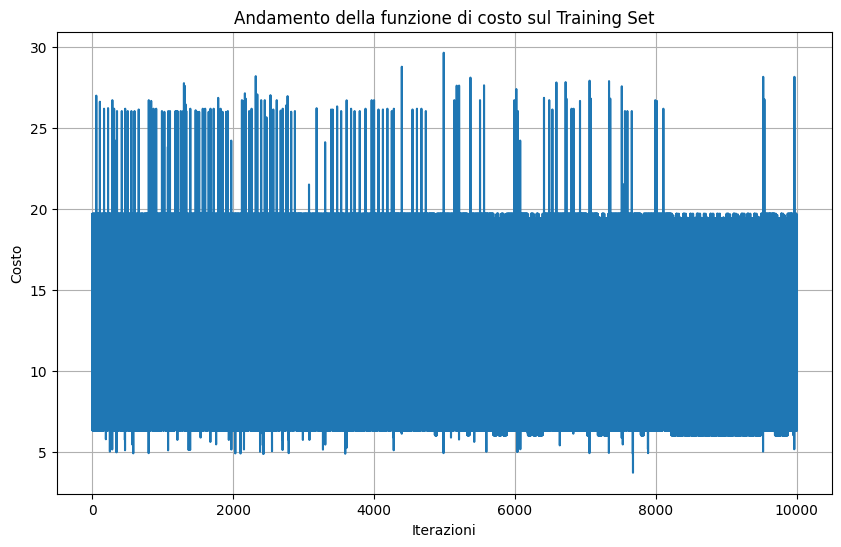

In [15]:
# Istanziazione del modello
logistic_model = LogisticRegression(learning_rate=0.01, n_iterations=10000)
# Addestramento del modello
logistic_model.fit(X_train, y_train)
# Visualizzazione dell'andamento della funzione di costo
logistic_model.plot_cost_history()

### Normalizziamo

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Avvio addestramento...
Iterazione 0: Costo train = 0.689677
Iterazione 100: Costo train = 0.575011
Iterazione 200: Costo train = 0.543595
Iterazione 300: Costo train = 0.525415
Iterazione 400: Costo train = 0.513501
Iterazione 500: Costo train = 0.505341
Iterazione 600: Costo train = 0.499613
Iterazione 700: Costo train = 0.495524
Iterazione 800: Costo train = 0.492567
Iterazione 900: Costo train = 0.490403
Iterazione 1000: Costo train = 0.488805
Iterazione 1100: Costo train = 0.487615
Iterazione 1200: Costo train = 0.486722
Iterazione 1300: Costo train = 0.486048
Iterazione 1400: Costo train = 0.485535
Iterazione 1500: Costo train = 0.485143
Iterazione 1600: Costo train = 0.484841
Iterazione 1700: Costo train = 0.484608
Iterazione 1800: Costo train = 0.484426
Iterazione 1900: Costo train = 0.484284
Iterazione 2000: Costo train = 0.484172
Iterazione 2100: Costo train = 0.484083
Iterazione 2200: Costo train = 0.484012
Iterazione 2300: Costo train = 0.483955
Iterazione 2400: Costo train 

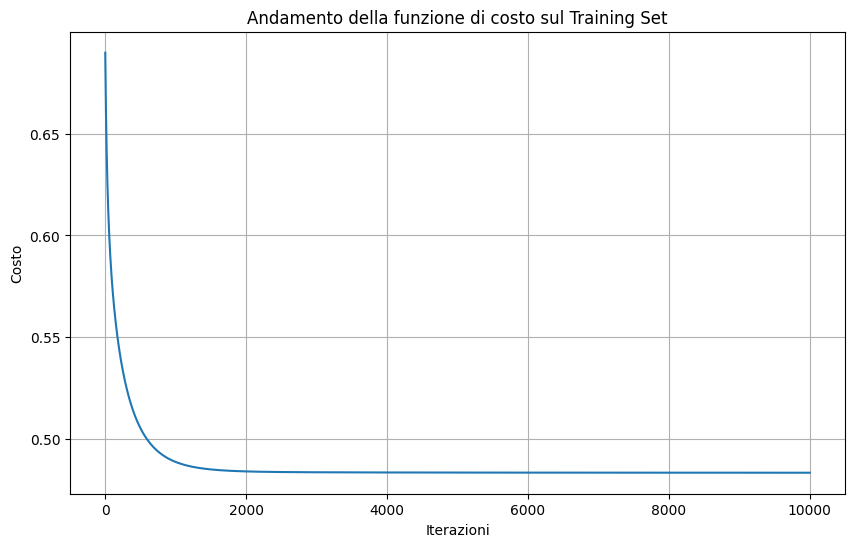

In [17]:
# Istanziazione del modello
logistic_model = LogisticRegression(learning_rate=0.01, n_iterations=10000)
# Addestramento del modello
logistic_model.fit(X_train, y_train)
# Visualizzazione dell'andamento della funzione di costo
logistic_model.plot_cost_history()

Costo sul test set: 0.484699


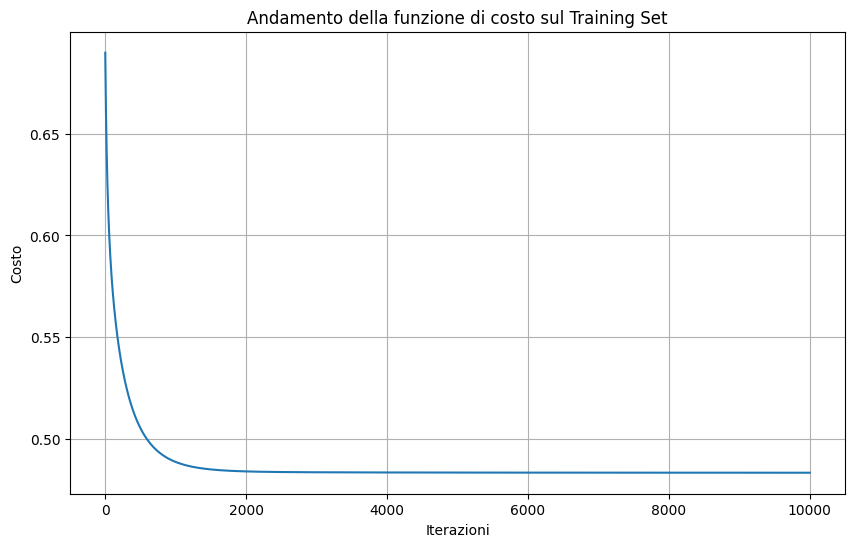

In [ ]:
test_cost = logistic_model.compute_cost(X_test, y_test, logistic_model.weights)
print(f"Costo sul test set: {test_cost:.6f}")

# Visualizza il grafico del costo sul test set
logistic_model.plot_cost_history()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Predizione sui dati di test
y_pred = logistic_model.predict(X_test)
# Calcolo dell'accuratezza
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy sul test set: {accuracy:.4f}")

Accuracy sul test set: 0.8111


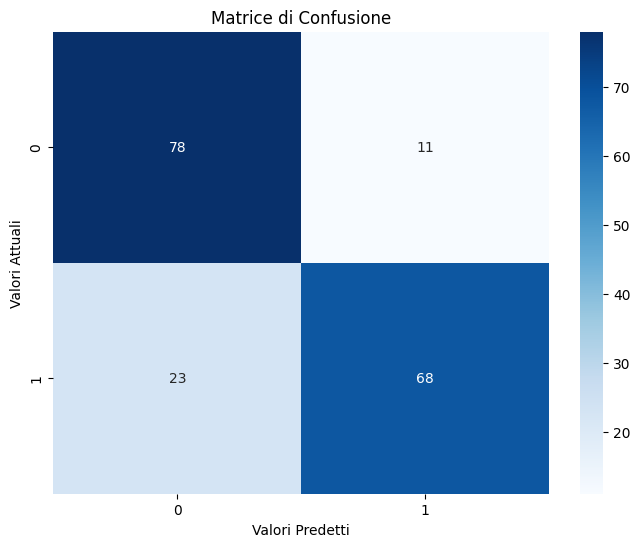

Accuracy: 0.8111
Precision: 0.8608
Recall: 0.7473
F1-score: 0.8000


In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import matplotlib.pyplot as plt

# Predizione sui dati di test
y_pred = logistic_model.predict(X_test)
# Calcolo della matrice di confusione
cm = confusion_matrix(y_test, y_pred)
# Visualizzazione della matrice di confusione
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice di Confusione')
plt.ylabel('Valori Attuali')
plt.xlabel('Valori Predetti')
plt.show()

# Calcolo delle metriche di valutazione
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.8111
Precision: 0.8608
Recall: 0.7473
F1-score: 0.8000


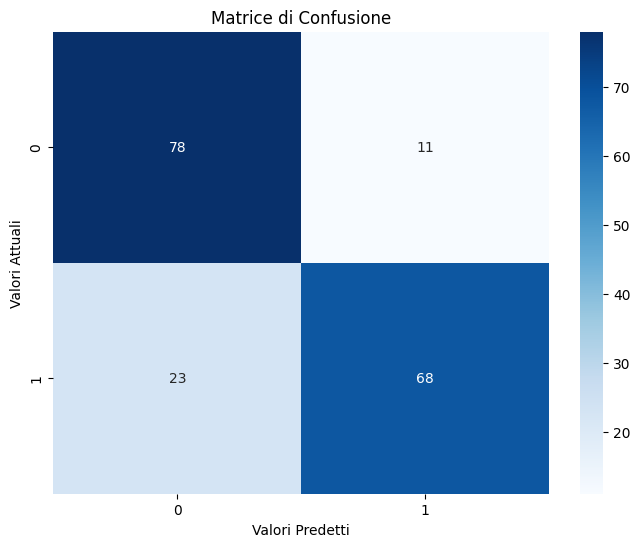

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns

import matplotlib.pyplot as plt

# Inizializza il modello di Regressione Logistica
logistic_model = LogisticRegression(random_state=42)

# Addestra il modello
logistic_model.fit(X_train, y_train)

# Effettua le predizioni sul set di test
y_pred = logistic_model.predict(X_test)

# Calcola e stampa le metriche di valutazione
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Calcola e visualizza la matrice di confusione
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice di Confusione')
plt.ylabel('Valori Attuali')
plt.xlabel('Valori Predetti')
plt.show()